### Technical analysts use a variety of indicators to make better informed investment decisions.  One of the most common indicators used are called Bollinger Bands.  In this project we will recreate the Bollinger Bands using pandas/ python data analysis 

####  Investopedia defines Bollinger Bands like this:

#### A Bollinger Band® is a technical analysis tool defined by a set of trendlines. They are plotted as two standard deviations, both positively and negatively, away from a simple moving average (SMA) of a security's price and can be adjusted to user preferences.

#### Bollinger Bands® was developed by technical trader John Bollinger and designed to give investors a higher probability of identifying when an asset is oversold or overbought.

### Model Construction:  The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average and can be modified.

In [1]:
import pandas as pn
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 

In [2]:
# import data 
df= yf.download('MSFT',start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,335.350006,338.000000,329.779999,334.750000,331.642426,28865100
2022-01-04 00:00:00-05:00,334.829987,335.200012,326.119995,329.010010,325.955750,32674300
2022-01-05 00:00:00-05:00,325.859985,326.070007,315.980011,316.380005,313.442993,40054300
2022-01-06 00:00:00-05:00,313.149994,318.700012,311.489990,313.880005,310.966217,39646100
2022-01-07 00:00:00-05:00,314.149994,316.500000,310.089996,314.040009,311.124725,32720000
...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,273.799988,273.980011,262.799988,263.619995,263.619995,42375100
2023-02-10 00:00:00-05:00,261.529999,264.089996,260.660004,263.100006,263.100006,25760900
2023-02-13 00:00:00-05:00,267.640015,274.600006,267.149994,271.320007,271.320007,44630900


####  After importing our high, low, close stock data, 
#### Creat two new columns:  One for the 20 day SMA, and another for standard deviation.

In [4]:
#  add SMA column..  calculate rolling mean
df['SMA'] = df.Close.rolling(window=20).mean()

In [5]:
df['stddev'] = df.Close.rolling(window=20).std()

In [6]:
#  view changes
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev
Date,,,,,,,,
2022-01-03 00:00:00-05:00,335.350006,338.000000,329.779999,334.750000,331.642426,28865100,NaN,NaN
2022-01-04 00:00:00-05:00,334.829987,335.200012,326.119995,329.010010,325.955750,32674300,NaN,NaN
2022-01-05 00:00:00-05:00,325.859985,326.070007,315.980011,316.380005,313.442993,40054300,NaN,NaN
2022-01-06 00:00:00-05:00,313.149994,318.700012,311.489990,313.880005,310.966217,39646100,NaN,NaN
2022-01-07 00:00:00-05:00,314.149994,316.500000,310.089996,314.040009,311.124725,32720000,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,273.799988,273.980011,262.799988,263.619995,263.619995,42375100,248.417000,10.993999
2023-02-10 00:00:00-05:00,261.529999,264.089996,260.660004,263.100006,263.100006,25760900,249.646500,11.200801
2023-02-13 00:00:00-05:00,267.640015,274.600006,267.149994,271.320007,271.320007,44630900,251.251001,11.906323


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282 entries, 2022-01-03 00:00:00-05:00 to 2023-02-15 00:00:00-05:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       282 non-null    float64
 1   High       282 non-null    float64
 2   Low        282 non-null    float64
 3   Close      282 non-null    float64
 4   Adj Close  282 non-null    float64
 5   Volume     282 non-null    int64  
 6   SMA        263 non-null    float64
 7   stddev     263 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 19.8 KB


#### Next we define our upper and lower bands

In [8]:
df['Upper']= df.SMA + 2*df.stddev

In [9]:
df['Lower']= df.SMA - 2*df.stddev

### Set strategy with Buy and Sell Signals
####  The strategy we will plot when Buy when the Lower Band is crossed (stock is oversold) and Sell when the Upper Band is crossed ( overbought ).

In [10]:
df["Buy_signal"]= np.where(df.Lower > df.Close, True, False)

In [11]:
df["Sell_signal"]= np.where(df.Lower < df.Close, True, False)

In [12]:
#### view changes
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,335.350006,338.000000,329.779999,334.750000,331.642426,28865100,NaN,NaN,NaN,NaN,False,False
2022-01-04 00:00:00-05:00,334.829987,335.200012,326.119995,329.010010,325.955750,32674300,NaN,NaN,NaN,NaN,False,False
2022-01-05 00:00:00-05:00,325.859985,326.070007,315.980011,316.380005,313.442993,40054300,NaN,NaN,NaN,NaN,False,False
2022-01-06 00:00:00-05:00,313.149994,318.700012,311.489990,313.880005,310.966217,39646100,NaN,NaN,NaN,NaN,False,False
2022-01-07 00:00:00-05:00,314.149994,316.500000,310.089996,314.040009,311.124725,32720000,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,273.799988,273.980011,262.799988,263.619995,263.619995,42375100,248.417000,10.993999,270.404999,226.429001,False,True
2023-02-10 00:00:00-05:00,261.529999,264.089996,260.660004,263.100006,263.100006,25760900,249.646500,11.200801,272.048103,227.244898,False,True
2023-02-13 00:00:00-05:00,267.640015,274.600006,267.149994,271.320007,271.320007,44630900,251.251001,11.906323,275.063646,227.438356,False,True


In [13]:
df= df.dropna()

#### With a clean df, we can now begin to visualize our data

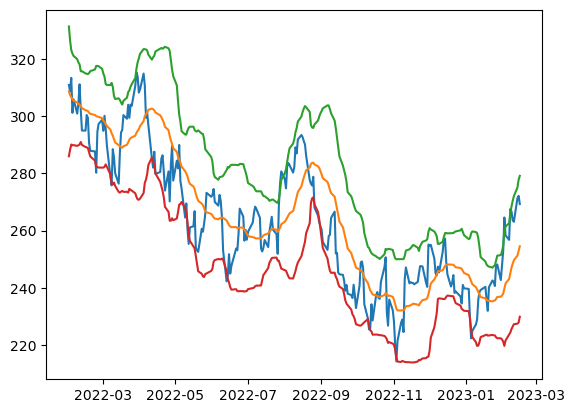

In [14]:
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.show()

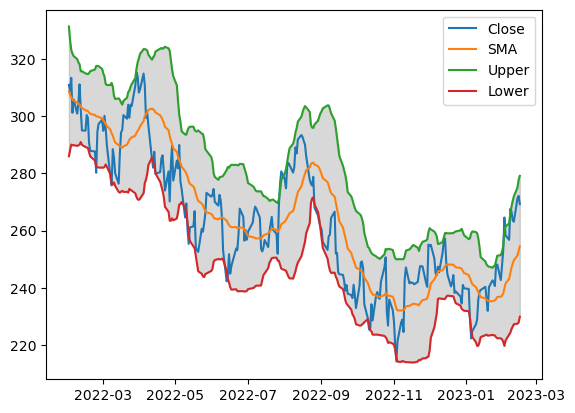

In [15]:
#  shading in betweeen the bands and add legend
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

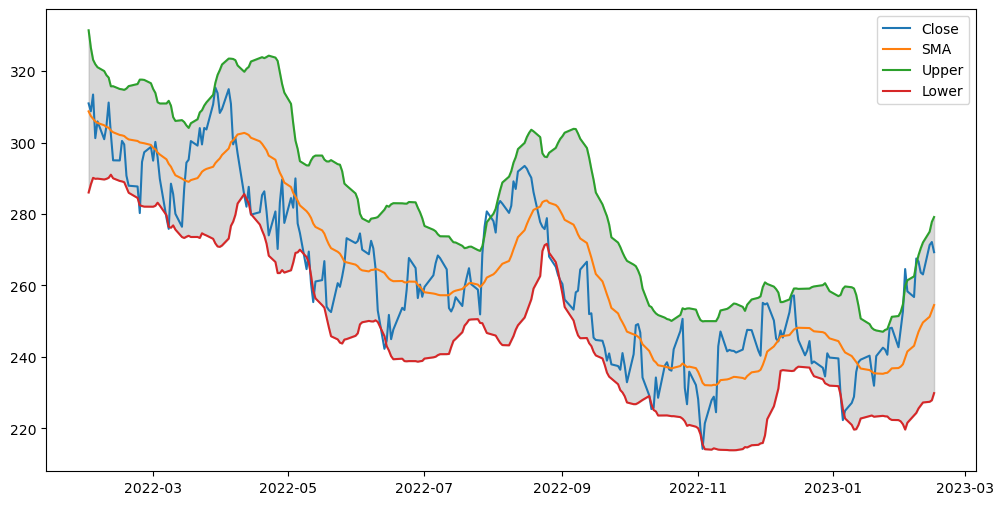

In [16]:
#  adjust the size of the chart
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()

In [17]:
# filter for dates where the buy signal = True
df1 = df.index[df.Buy_signal]

In [18]:
len(df1)

17

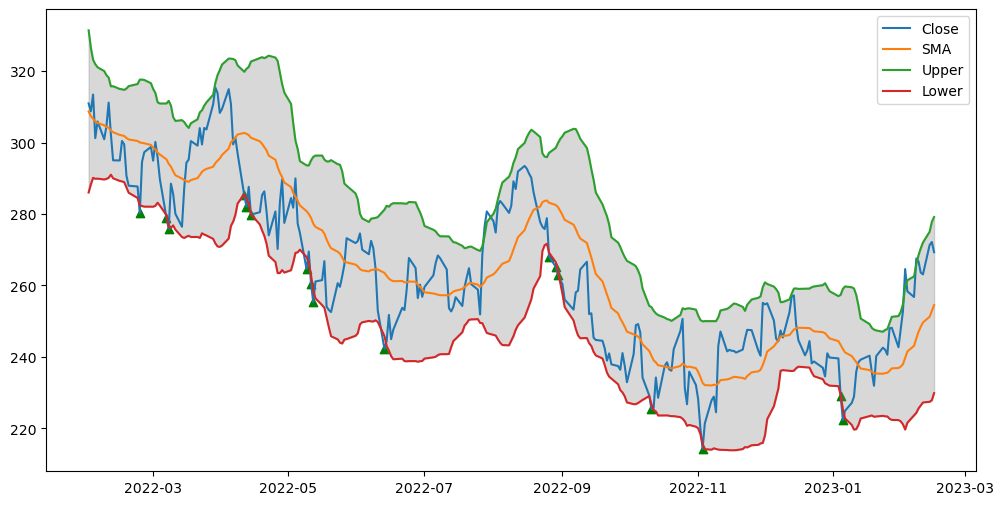

In [19]:
#  plot where the Buy signals were generate and adjust the size of the chart
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter (df.index[df.Buy_signal],df[df.Buy_signal].Close, marker= '^', color = 'green')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=.3)
plt.legend(['Close','SMA','Upper','Lower'])
plt.show()